<a href="https://colab.research.google.com/github/mmishra1092/Face-Emotion-Recognition/blob/main/MAYANK_MISHRA_Face_Emotion_Recognition_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import all the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
import cv2
import os
import sys
import random

from tensorflow import keras
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Activation
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import BatchNormalization
from keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from keras.regularizers import l2
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import TensorBoard
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from deepface import DeepFace

In [ ]:
# Read the file
img_array = cv2.imread('/content/Training_3908.jpg')

In [ ]:
# Check the shape
img_array.shape

(48, 48, 3)

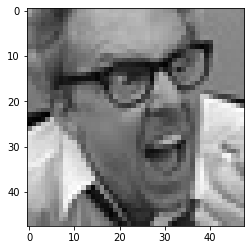

In [ ]:
# View the image
plt.imshow(img_array)

In [ ]:
# Create a variable for dataset path
Datadirectory="/content/drive/MyDrive/Module: 7/Capstone Project: Deep Learning & ML Engineering/Data/Training1"
Datadirectory_test="/content/drive/MyDrive/Module: 7/Capstone Project: Deep Learning & ML Engineering/Data/Testing"

In [ ]:
# Create a variable for the classes present in the dataset
Classes=["0","1","2","3","4","5","6"]

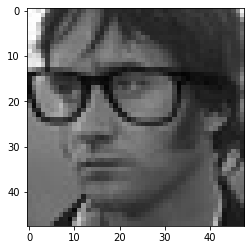

In [ ]:
# Get all the images.
for category in Classes:
    path=os.path.join(Datadirectory_test,category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        plt.imshow(cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break

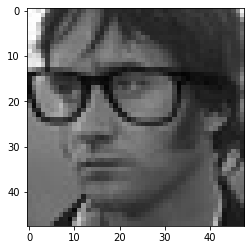

In [ ]:
# Check the result
img_size=48
new_array=cv2.resize(img_array, (img_size,img_size))
plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
# Install DeepFace
!pip install deepface

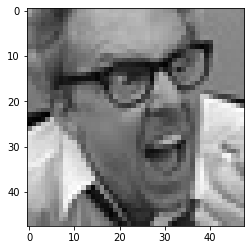

In [ ]:
 # View the image
img_array=cv2.imread("/content/Training_3908.jpg")
plt.imshow(img_array)

In [ ]:
# Analyze the image
DeepFace.analyze(img_array , enforce_detection=False)

Action: race: 100%|██████████| 4/4 [00:01<00:00,  3.78it/s]


{'age': 43,
 'dominant_emotion': 'angry',
 'dominant_race': 'white',
 'emotion': {'angry': 99.99947547912598,
  'disgust': 1.0348585877117955e-08,
  'fear': 8.695290034665959e-05,
  'happy': 0.00025386473225808004,
  'neutral': 2.6668555364040003e-06,
  'sad': 0.00017874582454169285,
  'surprise': 1.3905741835795737e-08},
 'gender': 'Man',
 'race': {'asian': 1.2447345846795983e-05,
  'black': 1.0654049704717087e-07,
  'indian': 1.4828730962898203e-05,
  'latino hispanic': 0.033922143078377175,
  'middle eastern': 0.05704731931718358,
  'white': 99.9089956392055},
 'region': {'h': 48, 'w': 48, 'x': 0, 'y': 0}}

In [ ]:
#Read all Training images
training_Data=[]

def creat_training_data():
    for category in Classes:
        path=os.path.join(Datadirectory,category)
        class_num=Classes.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array,(img_size,img_size))
                training_Data.append([new_array,class_num])
            except Exception as e:
                pass

In [ ]:
# Creating training data
creat_training_data()
print(len(training_Data))

random.shuffle(training_Data)

X=[]
y=[]
# Converting to array
for features,label in training_Data:
    X.append(features)
    y.append(label)
# converting it to 4 dimension    
X=np.array(X).reshape(-1, img_size, img_size, 3)

57458


In [ ]:
#Read all Testing images
testing_Data=[]

def creat_testing_data():
    for category in Classes:
        path=os.path.join(Datadirectory_test,category)
        class_num=Classes.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array,(img_size,img_size))
                testing_Data.append([new_array,class_num])
            except Exception as e:
                pass

In [ ]:
creat_testing_data()
print(len(testing_Data))

random.shuffle(testing_Data)

X_test=[]
y_test=[]
# Converting to array
for features,label in testing_Data:
    X_test.append(features)
    y_test.append(label)
# converting it to dimension    
X_test=np.array(X_test).reshape(-1, img_size, img_size, 3) 

7178


In [ ]:
# Data normalization
X= X/255.0;
Y=np.array(y)

In [ ]:
# Data normalization
X_test= X_test/255.0;
Y_test=np.array(y_test)

In [ ]:
# Using Pretrained MobileNetVerion2
model=tf.keras.applications.MobileNetV2()

In [ ]:
# View the model summary
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

In [ ]:
# Input
base_input=model.layers[0].input

In [ ]:
#Output
base_output = model.layers[-2].output
base_output

<KerasTensor: shape=(None, 1280) dtype=float32 (created by layer 'global_average_pooling2d_1')>

In [ ]:
# Add new layer after output of global pooling layer
final_output=layers.Dense(128)(base_output)
#activation function
final_output=layers.Activation('relu')(final_output) 
final_output=layers.Dense(64)(final_output)
final_output=layers.Activation ('relu')(final_output)
# Set the classes of 7
final_output= layers.Dense(7, activation='softmax')(final_output)

In [ ]:
# Output
final_output

<KerasTensor: shape=(None, 7) dtype=float32 (created by layer 'dense_8')>

In [ ]:
# Apply the keras model
new_model=keras.Model(inputs=base_input, outputs= final_output)

In [ ]:
# View the summary of new model
new_model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                           

In [ ]:
# compile new model to loss, optimizer and accuracy
new_model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [ ]:
# Model Training
new_model.fit(
    X,
    Y,
    batch_size=None,
    epochs=25,
    verbose="auto",
    callbacks=None,
    validation_split=0.0,
    validation_data=None,
    shuffle=True,
    class_weight=None,
    sample_weight=None,
    initial_epoch=0,
    steps_per_epoch=None,
    validation_steps=None,
    validation_batch_size=None,
    validation_freq=1,
    max_queue_size=10,
    workers=1,
    use_multiprocessing=False,
)

Epoch 1/25


ValueError: ignored

In [ ]:
new_model.fit(X, Y, epochs = 25)